# Anime Rating Case Study

### In the previous case study, we built a linear regression model on a clean version of the anime rating data.

### In this case study, we will introduce the unclean version of the same dataset, go through the steps of cleaning it, and apply transformations to a few columns of the data. This will help us build an improved linear regression model which can predict anime ratings more accurately using transformed versions of features like the number of episodes, the duration of episodes, the number of people who have watched, etc.

## Context

Streamist is a streaming company that streams web series and movies for a worldwide audience. Every content on their portal is rated by the viewers, and the portal also provides other information for the content like the number of people who have watched it, the number of people who want to watch it, the number of episodes, duration of an episode, etc.

They are currently focusing on the anime available in their portal, and want to identify the most important factors involved in rating an anime. You as a data scientist at Streamist are tasked with identifying the important factors and building a predictive model to predict the rating on an anime.


## Objective

To preprocess the raw data, analyze it, and build a linear regression model to predict the ratings of anime.


## Key Questions

1. What are the key factors influencing the rating of an anime?
2. Is there a good predictive model for the rating of an anime? What does the performance assessment look like for such a model?


## Data Information

Each record in the database provides a description of an anime. A detailed data dictionary can be found below.

**Data Dictionary**

- title - the title of anime
- mediaType - format of publication
- eps - number of episodes (movies are considered 1 episode)
- duration - duration of an episode
- ongoing - whether it is ongoing
- startYr - year that airing started
- finishYr - year that airing finished
- sznOfRelease - the season of release (Winter, Spring, Fall)
- description - the synopsis of the plot
- studios - studios responsible for creation
- tags - tags, genres, etc.
- contentWarn - content warning
- watched - number of users that completed it
- watching - number of users that are watching it
- wantWatch - number of users that want to watch it
- dropped - number of users that dropped it before completion
- rating - average user rating
- votes - number of votes that contribute to rating

## Let's start coding!

### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("anime_data_raw.csv")

<IPython.core.display.Javascript object>

In [3]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 14578 rows and 18 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
13764,Spy Penguin (2013): White Christmas,Web,1.0,2min,False,2013.0,2013.0,NaN,NaN,['Next Media Animation'],"['Action', 'Adventure', 'Animal Protagonists',...",[],8.0,0,10,0,NaN,NaN
3782,A Little Snow Fairy Sugar Summer Specials,TV Special,2.0,NaN,False,2003.0,2003.0,NaN,"One day, when Saga finds an old princess costu...",['J.C. Staff'],"['Fantasy', 'Family Friendly', 'Magic', 'Music...",[],1056.0,24,576,16,3.449,571.0
2289,Umineko: When They Cry,TV,26.0,NaN,False,2009.0,2009.0,Summer,"In the year 1986, eighteen members of the Ushi...",['Studio Deen'],"['Horror', 'Mystery', 'Inheritance', 'Island',...",['Explicit Violence'],10896.0,1451,8480,1236,3.787,9463.0
5081,Unbreakable Machine-Doll Specials,DVD Special,6.0,5min,False,2013.0,2014.0,NaN,NaN,['Lerche'],"['Ecchi', 'Fantasy', 'Magic', 'Magic School', ...",['Nudity'],1957.0,201,756,50,3.169,1312.0
9639,Hanako Oku: Hanabi,TV,1.0,6min,False,2015.0,2015.0,NaN,NaN,[],"['Romance', 'Slice of Life']",[],46.0,1,54,1,2.166,33.0
12608,Tamagotchi Honto no Hanashi,Movie,1.0,20min,False,1997.0,1997.0,NaN,NaN,[],"['Fantasy', 'Family Friendly']",[],11.0,2,18,0,NaN,NaN
6735,Violinist of Hamelin Movie,Movie,1.0,30min,False,1996.0,1996.0,NaN,"While on their quest to stop the Demon King, t...",['Nippon Animation'],"['Comedy', 'Fantasy']",[],247.0,6,167,8,2.826,152.0
12846,Neko Kikaku,Movie,1.0,37min,False,2018.0,2018.0,NaN,Nyagoya City is a trendy town where cats live....,['Speed Inc.'],"['Comedy', 'Mystery', 'Animal Protagonists', '...",[],12.0,3,102,2,NaN,NaN
884,Saint Young Men Movie,Movie,1.0,1hr 30min,False,2013.0,2013.0,NaN,Jesus and Buddha are enjoying their vacation i...,['A-1 Pictures'],"['Comedy', 'Fantasy', 'Seinen', 'Slice of Life...",[],2726.0,68,2074,37,4.156,1962.0
10524,Delinquent Hamsters / papalion ft. Piso Studio,Web,1.0,2min,False,2017.0,2017.0,Fall,NaN,['Piso Studio'],"['Comedy', 'Animal Protagonists', 'Delinquents...",[],18.0,0,18,0,1.927,10.0


<IPython.core.display.Javascript object>

* The *duration* column has values in hours and minutes.
* The *studios*, *tags*, and *contentWarn* columns have a list of values.
* There are a lot of missing values.

In [5]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
# checking for duplicate values in the data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicate values in the data.

In [7]:
# checking the names of the columns in the data
print(df.columns)

Index(['title', 'mediaType', 'eps', 'duration', 'ongoing', 'startYr',
       'finishYr', 'sznOfRelease', 'description', 'studios', 'tags',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes'],
      dtype='object')


<IPython.core.display.Javascript object>

In [8]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         14578 non-null  object 
 1   mediaType     14510 non-null  object 
 2   eps           14219 non-null  float64
 3   duration      9137 non-null   object 
 4   ongoing       14578 non-null  bool   
 5   startYr       14356 non-null  float64
 6   finishYr      14134 non-null  float64
 7   sznOfRelease  3767 non-null   object 
 8   description   8173 non-null   object 
 9   studios       14578 non-null  object 
 10  tags          14578 non-null  object 
 11  contentWarn   14578 non-null  object 
 12  watched       14356 non-null  float64
 13  watching      14578 non-null  int64  
 14  wantWatch     14578 non-null  int64  
 15  dropped       14578 non-null  int64  
 16  rating        12107 non-null  float64
 17  votes         12119 non-null  float64
dtypes: bool(1), float64(6), in

<IPython.core.display.Javascript object>

* There are many numeric (*float* and *int* type) and string (*object* type) columns in the data.
* Dependent variable is the rating of an anime, which is of *float* type.
* *ongoing* column is of *bool* type.

In [9]:
# checking for missing values in the data.
df.isnull().sum()

title               0
mediaType          68
eps               359
duration         5441
ongoing             0
startYr           222
finishYr          444
sznOfRelease    10811
description      6405
studios             0
tags                0
contentWarn         0
watched           222
watching            0
wantWatch           0
dropped             0
rating           2471
votes            2459
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in many columns.

In [10]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,14578,14578,Mitsuwano,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,14510,8,TV,4510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,14219.0,NaN,NaN,NaN,13.501231,62.262185,1.0,1.0,1.0,12.0,2527.0
duration,9137,147,4min,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,14578,2,False,14356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,14356.0,NaN,NaN,NaN,2005.457788,14.707105,1907.0,2000.0,2010.0,2016.0,2026.0
finishYr,14134.0,NaN,NaN,NaN,2005.515919,14.656509,1907.0,2000.0,2010.0,2016.0,2026.0
sznOfRelease,3767,4,Spring,1202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,8173,8108,The films will follow The First Summer of Love...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,14578,864,[],4808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* We can see that the anime ratings vary between 0.844 and 4.702, which suggests that the anime were rated on a scale of 0-5.
* *TV* is the most occurring type of media.
* For anime whose season of release is available, *Spring* is the most common season.
* The number of views for the anime in the data has a very wide range (0 to more than 160,000).

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### We will drop the missing values in *rating* column as it is the target variable.

In [11]:
df.dropna(subset=["rating"], inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# checking missing values in rest of the data
df.isnull().sum()

title              0
mediaType         63
eps                0
duration        4636
ongoing            0
startYr            6
finishYr         121
sznOfRelease    8560
description     4474
studios            0
tags               0
contentWarn        0
watched          115
watching           0
wantWatch          0
dropped            0
rating             0
votes              0
dtype: int64

<IPython.core.display.Javascript object>

### Let us look at the entries with no start year.

In [13]:
df[df.startYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
1405,Unbelievable Space Love,Web,10.0,1min,False,NaN,NaN,NaN,NaN,[],"['BL', 'Romance', 'Shounen-ai', 'Dream World',...",[],90.0,16,343,0,4.012,54.0
5225,Manbo-P: Irokoizata wa Subete Sakuzu de Kaiket...,Music Video,1.0,5min,False,NaN,NaN,NaN,NaN,[],"['Comedy', 'Romance', 'Vocaloid']",[],41.0,0,25,0,3.139,20.0
9821,Mameshiba: Mamerry Christmas,Other,1.0,1min,False,NaN,NaN,NaN,NaN,[],"['Christmas', 'Family Friendly', 'Shorts', 'St...",[],57.0,1,17,0,2.119,35.0
10270,Meow no Hoshi,Other,1.0,5min,False,NaN,NaN,NaN,NaN,[],"['Drama', 'Animal Protagonists', 'Cats', 'Mela...",[],40.0,0,25,0,1.999,25.0
11982,Landmark,Web,1.0,4min,False,NaN,NaN,NaN,NaN,[],"['Abstract', 'Black and White']",[],34.0,0,9,0,1.256,21.0
12089,Burutabu-chan,Other,3.0,1min,False,NaN,NaN,NaN,NaN,[],"['Comedy', 'Crude', 'Short Episodes']",[],46.0,1,10,1,1.046,33.0


<IPython.core.display.Javascript object>

* We will drop the entries with no start year as this is a difficult column to impute.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [14]:
df.dropna(subset=["startYr"], inplace=True)

<IPython.core.display.Javascript object>

In [15]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [16]:
# checking missing values in rest of the data
df.isnull().sum()

title              0
mediaType         63
eps                0
duration        4636
ongoing            0
startYr            0
finishYr         115
sznOfRelease    8554
description     4468
studios            0
tags               0
contentWarn        0
watched          115
watching           0
wantWatch          0
dropped            0
rating             0
votes              0
dtype: int64

<IPython.core.display.Javascript object>

### Let us look at the entries with no finish year.

In [17]:
df[df.finishYr.isnull()]

,title,mediaType,eps,duration,ongoing,startYr,finishYr,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes
13,Kaguya-sama: Love Is War?,TV,10.0,NaN,True,2020.0,NaN,Spring,The battle between love and pride continues! N...,['A-1 Pictures'],"['Comedy', 'Drama', 'Romance', 'Seinen', 'Epis...",[],NaN,6368,5747,96,4.617,2359.0
46,Douluo Dalu 2,Web,82.0,22min,True,2018.0,NaN,NaN,Second season of Douluo Dalu.,[],"['Action', 'Fantasy', 'Chinese Animation', 'Cu...",[],NaN,1167,990,32,4.540,549.0
70,Fruits Basket 2nd Season,TV,10.0,NaN,True,2020.0,NaN,Spring,Second season of Fruits Basket.,"['TMS Entertainment', '8 Pan']","['Comedy', 'Drama', 'Fantasy', 'Romance', 'Sho...",[],NaN,4160,4427,55,4.527,1194.0
111,Ascendance of a Bookworm: Part II,TV,11.0,NaN,True,2020.0,NaN,Spring,"With her baptism ceremony complete, Myne begin...",['Ajia-do'],"['Drama', 'Fantasy', 'Apprenticeship', 'Cheats...",[],NaN,3183,1916,29,4.483,1139.0
115,Rakshasa Street 2nd Season,Web,5.0,NaN,True,2019.0,NaN,NaN,NaN,[],"['Action', 'Shounen', 'Chinese Animation', 'Su...",[],NaN,47,102,0,4.482,10.0
121,Kingdom 3,TV,4.0,NaN,True,2020.0,NaN,Spring,Third season of Kingdom.,"['Studio Pierrot', 'St. Signpost']","['Action', 'Drama', 'Seinen', 'Ancient China',...",[],NaN,515,740,14,4.476,202.0
239,One Piece,TV,929.0,NaN,True,1999.0,NaN,Fall,Long ago the infamous Gol D. Roger was the str...,['Toei Animation'],"['Action', 'Adventure', 'Comedy', 'Fantasy', '...",[],NaN,74537,16987,12445,4.402,59737.0
262,Tower of God,TV,11.0,NaN,True,2020.0,NaN,Spring,Fame. Glory. Power. Anything in your wildest d...,['Telecom Animation Film'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'H...","['Mature Themes', 'Suicide', 'Violence']",NaN,9568,5085,187,4.391,3387.0
314,Wu Geng Ji 3rd Season,Web,21.0,NaN,True,2019.0,NaN,NaN,Third season of Wu Geng Ji.,[],"['Action', 'Fantasy', 'Ancient China', 'Chines...",[],NaN,50,140,1,4.366,19.0
324,A Certain Scientific Railgun T,TV,15.0,NaN,True,2020.0,NaN,Winter,Mikoto Misaka and her friends prepare for the ...,['J.C. Staff'],"['Action', 'Sci Fi', 'Elemental Powers', 'Psyc...",[],NaN,1825,2939,43,4.365,638.0


<IPython.core.display.Javascript object>

In [18]:
# checking the summary of the data with missing values in finishYr
df[df.finishYr.isnull()].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
title,115,115,GJ8 Man,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mediaType,115,6,TV,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,115.0,NaN,NaN,NaN,136.521739,408.981219,1.0,4.5,10.0,22.0,2527.0
duration,50,18,1min,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ongoing,115,1,True,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
startYr,115.0,NaN,NaN,NaN,2016.521739,8.053928,1969.0,2018.0,2020.0,2020.0,2020.0
finishYr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,75,4,Spring,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,79,79,Fourth season of Quanzhi Fashi.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studios,115,66,[],23,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* More than 25% of the entries with missing finish year are have started on or after 2018.
* So, we will assume that the anime with missing values in *finishYr* are still airing, and fill the values with 2020 (the year the data was collected).
* You can experiment by dropping the entries where the finish year is missing.
* The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [19]:
df["finishYr"].fillna(2020, inplace=True)

# checking missing values in rest of the data
df.isnull().sum()

title              0
mediaType         63
eps                0
duration        4636
ongoing            0
startYr            0
finishYr           0
sznOfRelease    8554
description     4468
studios            0
tags               0
contentWarn        0
watched          115
watching           0
wantWatch          0
dropped            0
rating             0
votes              0
dtype: int64

<IPython.core.display.Javascript object>

* The missing values in startYr and finishYr columns have been dealt with.
* **We will now create a new variable *years_running*, which will be calculated as *finishYr* minus *startYr*.**
* **We will also drop the *finishYr* and *startYr* columns.**

In [20]:
df["years_running"] = df["finishYr"] - df["startYr"]
df.drop(["startYr", "finishYr"], axis=1, inplace=True)
df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0,1.0
1,your name.,Movie,1.0,1hr 47min,False,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0,0.0
2,A Silent Voice,Movie,1.0,2hr 10min,False,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0,0.0


<IPython.core.display.Javascript object>

### Let's convert the duration column from string to numeric.

In [21]:
# we define a function to convert the duration column to numeric


def time_to_minutes(var):
    if isinstance(var, str):  # checking if the value is string or not
        if "hr" in var:  # checking for the presence of hours in the duration
            spl = var.split(" ")  # splitting the value by space
            hr = (
                float(spl[0].replace("hr", "")) * 60
            )  # taking numeric part and converting hours to minutes
            mt = float(spl[1].replace("min", ""))  # taking numeric part of minutes
            return hr + mt
        else:
            return float(var.replace("min", ""))  # taking numeric part of minutes
    else:
        return np.nan  # will return NaN if value is not string

<IPython.core.display.Javascript object>

In [22]:
# let's apply the function to the duration column and overwrite the column
df["duration"] = df["duration"].apply(time_to_minutes)
df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,['Bones'],"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...","['Animal Abuse', 'Mature Themes', 'Violence', ...",103707.0,14351,25810,2656,4.702,86547.0,1.0
1,your name.,Movie,1.0,107.0,False,NaN,Mitsuha and Taki are two total strangers livin...,['CoMix Wave Films'],"['Drama', 'Romance', 'Body Swapping', 'Gender ...",[],58831.0,1453,21733,124,4.663,43960.0,0.0
2,A Silent Voice,Movie,1.0,130.0,False,NaN,"After transferring into a new school, a deaf g...",['Kyoto Animation'],"['Drama', 'Shounen', 'Disability', 'Melancholy...","['Bullying', 'Mature Themes', 'Suicide']",45892.0,946,17148,132,4.661,33752.0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",['Production I.G'],"['Shounen', 'Sports', 'Animeism', 'School Club...",[],25134.0,2183,8082,167,4.660,17422.0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,['Wit Studio'],"['Action', 'Fantasy', 'Horror', 'Shounen', 'Da...","['Cannibalism', 'Explicit Violence']",21308.0,3217,7864,174,4.650,15789.0,0.0


<IPython.core.display.Javascript object>

In [23]:
# let's check the summary of the duration column
df["duration"].describe()

count    7465.000000
mean       24.230141
std        31.468171
min         1.000000
25%         4.000000
50%         8.000000
75%        30.000000
max       163.000000
Name: duration, dtype: float64

<IPython.core.display.Javascript object>

* 50% of the anime in the data have a runtime less than or equal to 8 minutes.


* Some anime even have a runtime of 1 minute.
    - This seems strange at first, but a Google search can reveal that there are indeed such anime.

### We will fill the missing values in the *sznOfRelease* column with '*is_missing*', which will act as a new category.

In [24]:
df["sznOfRelease"].fillna("is_missing", inplace=True)
df.isnull().sum()

title               0
mediaType          63
eps                 0
duration         4636
ongoing             0
sznOfRelease        0
description      4468
studios             0
tags                0
contentWarn         0
watched           115
watching            0
wantWatch           0
dropped             0
rating              0
votes               0
years_running       0
dtype: int64

<IPython.core.display.Javascript object>

**Let's check the number of unique values and the number of times they occur for the *mediaType* column.**

In [25]:
df.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           580
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

### We will fill the missing values in the *mediaType* column with '*Other*', as the exact values for that category are not known.

In [26]:
df.mediaType.fillna("Other", inplace=True)

# checking the number of unique values and the number of times they occur
df.mediaType.value_counts()

TV             3993
Movie          1928
OVA            1770
Music Video    1290
Web            1170
DVD Special     803
Other           643
TV Special      504
Name: mediaType, dtype: int64

<IPython.core.display.Javascript object>

**We saw that *studios*, *tags*, and *contentWarn* columns have  a list of values.**


### Let us remove the leading and trailing square braces from the values in those columns.


**We will also replace the entries with blank lists in these columns with *NaN*.**

In [27]:
cols_with_list_vals = ["studios", "tags", "contentWarn"]

for col in cols_with_list_vals:
    df[col] = (
        df[col].str.lstrip("[").str.rstrip("]")
    )  # remove the leading and trailing square braces
    df[col] = df[col].replace("", np.nan)  # mark as NaN if the value is a blank string

df.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,'Bones',"'Action', 'Adventure', 'Drama', 'Fantasy', 'My...","'Animal Abuse', 'Mature Themes', 'Violence', '...",103707.0,14351,25810,2656,4.702,86547.0,1.0
1,your name.,Movie,1.0,107.0,False,is_missing,Mitsuha and Taki are two total strangers livin...,'CoMix Wave Films',"'Drama', 'Romance', 'Body Swapping', 'Gender B...",NaN,58831.0,1453,21733,124,4.663,43960.0,0.0
2,A Silent Voice,Movie,1.0,130.0,False,is_missing,"After transferring into a new school, a deaf g...",'Kyoto Animation',"'Drama', 'Shounen', 'Disability', 'Melancholy'...","'Bullying', 'Mature Themes', 'Suicide'",45892.0,946,17148,132,4.661,33752.0,0.0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...",'Production I.G',"'Shounen', 'Sports', 'Animeism', 'School Club'...",NaN,25134.0,2183,8082,167,4.660,17422.0,0.0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,'Wit Studio',"'Action', 'Fantasy', 'Horror', 'Shounen', 'Dar...","'Cannibalism', 'Explicit Violence'",21308.0,3217,7864,174,4.650,15789.0,0.0


<IPython.core.display.Javascript object>

In [28]:
# checking missing values in rest of the data
df.isnull().sum()

title                0
mediaType            0
eps                  0
duration          4636
ongoing              0
sznOfRelease         0
description       4468
studios           3208
tags               313
contentWarn      10705
watched            115
watching             0
wantWatch            0
dropped              0
rating               0
votes                0
years_running        0
dtype: int64

<IPython.core.display.Javascript object>

### Treating the *studios* column

In [29]:
df.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running
7002,Tales of the Rays: Mirrage Prison,Web,1.0,1.0,False,is_missing,NaN,NaN,"'Fantasy', 'Promotional'",NaN,81.0,3,80,1,2.767,38.0,0.0
11871,Onikiri Shoujo,Web,1.0,1.0,False,is_missing,NaN,NaN,"'Action', 'Black and White', 'Hand to Hand Com...",NaN,44.0,0,25,1,1.359,25.0,0.0
7492,Triage X,TV,10.0,NaN,False,Spring,Mochizuki General Hospital boasts some of the ...,'XEBEC',"'Action', 'Ecchi', 'Harem', 'Shounen', 'Assass...","'Drug Use', 'Explicit Sex', 'Mature Themes', '...",4129.0,871,2867,788,2.665,3485.0,0.0
3852,Rainbow Days OVA,OVA,1.0,NaN,False,is_missing,NaN,'Ashi Productions',"'Romance', 'Shoujo', 'School Life', 'Based on ...",NaN,580.0,24,987,8,3.432,291.0,0.0
4506,Endro~!,TV,12.0,NaN,False,Winter,"In the land of Naral Island, a land of magic a...",'Studio Gokumi',"'Fantasy', 'Slice of Life', 'Magic', 'RPG', 'O...",NaN,1033.0,372,1205,254,3.290,976.0,0.0
9863,Heybot!,TV,50.0,NaN,False,Summer,"The story takes place on Screw Island, a screw...",'BN Pictures',"'Comedy', 'Family Friendly', 'Island', 'Non-Hu...",NaN,33.0,14,62,36,2.107,54.0,1.0
3513,Unico,Movie,1.0,90.0,False,is_missing,Unico is a special unicorn with the ability to...,'MADHOUSE',"'Adventure', 'Fantasy', 'Animal Protagonists',...",NaN,748.0,7,371,17,3.508,459.0,0.0
10605,Ali Baba to 40-hiki no Touzoku,Movie,1.0,56.0,False,is_missing,"Generations ago, the wily Ali Baba stole a cav...",'Toei Animation',"'Adventure', 'Family Friendly', 'Middle Easter...",NaN,305.0,7,99,12,1.897,147.0,0.0
10270,rerulili: Girls Talk,Music Video,1.0,4.0,False,is_missing,NaN,NaN,NaN,NaN,18.0,0,5,0,1.995,13.0,0.0
2942,Majestic Prince Movie: Kakusei no Idenshiko,Movie,1.0,NaN,False,is_missing,NaN,"'Seven Arcs Pictures', 'Orange'","'Action', 'Drama', 'Mecha', 'Sci Fi', 'Seinen'...",NaN,261.0,11,423,8,3.634,168.0,0.0


<IPython.core.display.Javascript object>

* We can see that row 2942 has more than one studio, which indicates a collaboration between studios.
* We will split the tags column by ', ' and take all the values in one dataframe for further analysis.

In [30]:
studio_df = pd.DataFrame(
    df.studios.str.split(", ", expand=True).values.flatten(), columns=["Studios"]
)
val_c = studio_df.Studios.value_counts()
val_c

'Toei Animation'                         636
'Sunrise'                                433
'J.C. Staff'                             341
'MADHOUSE'                               339
'TMS Entertainment'                      319
                                        ... 
'ASK Animation'                            1
'Rockwell Eyes'                            1
'Candy Box'                                1
'Children’s Playground Entertainment'      1
'DOGA Productions'                         1
Name: Studios, Length: 488, dtype: int64

<IPython.core.display.Javascript object>

* There are too many studios in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those studios with at least as many entries as the threshold.

In [31]:
# we take 100 as threshold
threshold = 100
val_c[val_c.values >= threshold]

'Toei Animation'          636
'Sunrise'                 433
'J.C. Staff'              341
'MADHOUSE'                339
'TMS Entertainment'       319
'Production I.G'          279
'Studio Deen'             266
'Studio Pierrot'          223
'OLM'                     216
'A-1 Pictures'            194
'AIC'                     167
'Shin-Ei Animation'       165
'Tatsunoko Production'    146
'Nippon Animation'        145
'XEBEC'                   143
'DLE'                     134
'GONZO'                   132
'Bones'                   122
'Shaft'                   119
'Kyoto Animation'         108
Name: Studios, dtype: int64

<IPython.core.display.Javascript object>

* 100 looks to be a good threshold.
* We will keep only those studios that have created more than 100 anime, and the rest we will assign as '*Others*'.
* You can experiment by using a different threshold.

In [32]:
# list of studios
studios_list = val_c[val_c.values >= threshold].index.tolist()
print("Studio names taken into consideration:", len(studios_list), studios_list)

Studio names taken into consideration: 20 ["'Toei Animation'", "'Sunrise'", "'J.C. Staff'", "'MADHOUSE'", "'TMS Entertainment'", "'Production I.G'", "'Studio Deen'", "'Studio Pierrot'", "'OLM'", "'A-1 Pictures'", "'AIC'", "'Shin-Ei Animation'", "'Tatsunoko Production'", "'Nippon Animation'", "'XEBEC'", "'DLE'", "'GONZO'", "'Bones'", "'Shaft'", "'Kyoto Animation'"]


<IPython.core.display.Javascript object>

In [33]:
# let us create a copy of our dataframe
df1 = df.copy()

<IPython.core.display.Javascript object>

In [34]:
# first we will fill missing values in the columns by 'Others'
df1.studios.fillna("'Others'", inplace=True)
df1.studios.isnull().sum()

0

<IPython.core.display.Javascript object>

* We will now assign the studio names to the entries.
* We will also create a new variable that will show if collaboration between studios was involved for creating an anime.

In [35]:
studio_val = []

for i in range(df1.shape[0]):  # iterate over all rows in data
    txt = df1.studios.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in studios_list:  # iterate over the list of studios considered
        if item in txt and flag == 0:  # checking if studio name is in the row
            studio_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        studio_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
df1["studio_primary"] = [item.strip("'") for item in studio_val]
df1.tail()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running,studio_primary
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Movie,1.0,NaN,False,is_missing,Princess Vanilla is a princess in a land of ic...,'TMS Entertainment',"'Anthropomorphic', 'Family Friendly', 'Food Pr...",NaN,22.0,1,29,1,2.807,10.0,0.0,TMS Entertainment
12097,Hulaing Babies Petit,TV,12.0,5.0,False,Winter,NaN,'Fukushima Gaina',"'Comedy', 'Chibi', 'Short Episodes', 'Original...",NaN,13.0,10,77,2,2.090,10.0,0.0,Others
12098,Marco & The Galaxy Dragon,OVA,1.0,NaN,False,is_missing,NaN,'Others',"'Action', 'Comedy', 'Based on a Video Game'",NaN,17.0,0,65,0,2.543,10.0,0.0,Others
12099,Xing Chen Bian 2nd Season,Web,3.0,24.0,True,is_missing,Second season of Xing Chen Bian.,'Others',"'Action', 'Chinese Animation', 'Based on a Nov...",NaN,NaN,31,22,0,3.941,10.0,0.0,Others
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,Movie,1.0,20.0,False,is_missing,NaN,'Shin-Ei Animation',"'Comedy', 'Sci Fi', 'Superpowers', 'Based on a...",NaN,15.0,1,19,1,2.925,10.0,0.0,Shin-Ei Animation


<IPython.core.display.Javascript object>

In [36]:
# we will create a list defining whether there is a collaboration between studios
# we will check if the second split has None values, which will mean no collaboration between studios
studio_val2 = [
    0 if item is None else 1
    for item in df1.studios.str.split(", ", expand=True).iloc[:, 1]
]

df1["studios_colab"] = studio_val2
df1.tail()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,studios,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running,studio_primary,studios_colab
12096,Sore Ike! Anpanman: Kirameke! Ice no Kuni no V...,Movie,1.0,NaN,False,is_missing,Princess Vanilla is a princess in a land of ic...,'TMS Entertainment',"'Anthropomorphic', 'Family Friendly', 'Food Pr...",NaN,22.0,1,29,1,2.807,10.0,0.0,TMS Entertainment,0
12097,Hulaing Babies Petit,TV,12.0,5.0,False,Winter,NaN,'Fukushima Gaina',"'Comedy', 'Chibi', 'Short Episodes', 'Original...",NaN,13.0,10,77,2,2.090,10.0,0.0,Others,0
12098,Marco & The Galaxy Dragon,OVA,1.0,NaN,False,is_missing,NaN,'Others',"'Action', 'Comedy', 'Based on a Video Game'",NaN,17.0,0,65,0,2.543,10.0,0.0,Others,0
12099,Xing Chen Bian 2nd Season,Web,3.0,24.0,True,is_missing,Second season of Xing Chen Bian.,'Others',"'Action', 'Chinese Animation', 'Based on a Nov...",NaN,NaN,31,22,0,3.941,10.0,0.0,Others,0
12100,Ultra B: Black Hole kara no Dokusaisha BB!!,Movie,1.0,20.0,False,is_missing,NaN,'Shin-Ei Animation',"'Comedy', 'Sci Fi', 'Superpowers', 'Based on a...",NaN,15.0,1,19,1,2.925,10.0,0.0,Shin-Ei Animation,0


<IPython.core.display.Javascript object>

**We will now drop the '*studios*' column.**

In [37]:
df1.drop("studios", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Treating the *tags* column

In [38]:
df1.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running,studio_primary,studios_colab
7002,Tales of the Rays: Mirrage Prison,Web,1.0,1.0,False,is_missing,NaN,"'Fantasy', 'Promotional'",NaN,81.0,3,80,1,2.767,38.0,0.0,Others,0
11871,Onikiri Shoujo,Web,1.0,1.0,False,is_missing,NaN,"'Action', 'Black and White', 'Hand to Hand Com...",NaN,44.0,0,25,1,1.359,25.0,0.0,Others,0
7492,Triage X,TV,10.0,NaN,False,Spring,Mochizuki General Hospital boasts some of the ...,"'Action', 'Ecchi', 'Harem', 'Shounen', 'Assass...","'Drug Use', 'Explicit Sex', 'Mature Themes', '...",4129.0,871,2867,788,2.665,3485.0,0.0,XEBEC,0
3852,Rainbow Days OVA,OVA,1.0,NaN,False,is_missing,NaN,"'Romance', 'Shoujo', 'School Life', 'Based on ...",NaN,580.0,24,987,8,3.432,291.0,0.0,Others,0
4506,Endro~!,TV,12.0,NaN,False,Winter,"In the land of Naral Island, a land of magic a...","'Fantasy', 'Slice of Life', 'Magic', 'RPG', 'O...",NaN,1033.0,372,1205,254,3.290,976.0,0.0,Others,0
9863,Heybot!,TV,50.0,NaN,False,Summer,"The story takes place on Screw Island, a screw...","'Comedy', 'Family Friendly', 'Island', 'Non-Hu...",NaN,33.0,14,62,36,2.107,54.0,1.0,Others,0
3513,Unico,Movie,1.0,90.0,False,is_missing,Unico is a special unicorn with the ability to...,"'Adventure', 'Fantasy', 'Animal Protagonists',...",NaN,748.0,7,371,17,3.508,459.0,0.0,MADHOUSE,0
10605,Ali Baba to 40-hiki no Touzoku,Movie,1.0,56.0,False,is_missing,"Generations ago, the wily Ali Baba stole a cav...","'Adventure', 'Family Friendly', 'Middle Easter...",NaN,305.0,7,99,12,1.897,147.0,0.0,Toei Animation,0
10270,rerulili: Girls Talk,Music Video,1.0,4.0,False,is_missing,NaN,NaN,NaN,18.0,0,5,0,1.995,13.0,0.0,Others,0
2942,Majestic Prince Movie: Kakusei no Idenshiko,Movie,1.0,NaN,False,is_missing,NaN,"'Action', 'Drama', 'Mecha', 'Sci Fi', 'Seinen'...",NaN,261.0,11,423,8,3.634,168.0,0.0,Others,1


<IPython.core.display.Javascript object>

* We can see that most of the rows have more than one tag.
* We will split the tags column by ', ' and take all the values in one dataframe for further analysis.

In [39]:
tag_df = pd.DataFrame(
    df1.tags.str.split(", ", expand=True).values.flatten(), columns=["Tags"]
)
val_c = tag_df.Tags.value_counts()
val_c

'Based on a Manga'     3519
'Comedy'               3302
'Action'               2798
'Fantasy'              2197
'Sci Fi'               2012
                       ... 
'Badminton'               1
'Sexual Content'          1
'Ballet Dancing'          1
'Explicit Violence'       1
'Billiards'               1
Name: Tags, Length: 494, dtype: int64

<IPython.core.display.Javascript object>

* There are too many tags in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those tags with at least as many entries as the threshold.

In [40]:
# we take 500 as threshold
threshold = 500
val_c[val_c.values >= threshold]

'Based on a Manga'          3519
'Comedy'                    3302
'Action'                    2798
'Fantasy'                   2197
'Sci Fi'                    2012
'Shounen'                   1753
'Original Work'             1636
'Non-Human Protagonists'    1361
'Drama'                     1284
'Adventure'                 1256
'Family Friendly'           1174
'Short Episodes'            1173
'School Life'               1117
'Romance'                   1115
'Shorts'                    1085
'Slice of Life'              978
'Seinen'                     933
'Supernatural'               858
'Magic'                      778
'Animal Protagonists'        730
'Ecchi'                      695
'Mecha'                      660
'Based on a Light Novel'     646
'CG Animation'               606
'Superpowers'                540
Name: Tags, dtype: int64

<IPython.core.display.Javascript object>

* 500 looks to be a good threshold.
* We will keep only those tags that have more than 500 entries in the data, and the rest we will assign as '*Others*'.
* You can experiment by using a different threshold.

In [41]:
# list of tags
tags_list = val_c[val_c.values >= threshold].index.tolist()
print("Tags taken into consideration:", len(tags_list), tags_list)

Tags taken into consideration: 25 ["'Based on a Manga'", "'Comedy'", "'Action'", "'Fantasy'", "'Sci Fi'", "'Shounen'", "'Original Work'", "'Non-Human Protagonists'", "'Drama'", "'Adventure'", "'Family Friendly'", "'Short Episodes'", "'School Life'", "'Romance'", "'Shorts'", "'Slice of Life'", "'Seinen'", "'Supernatural'", "'Magic'", "'Animal Protagonists'", "'Ecchi'", "'Mecha'", "'Based on a Light Novel'", "'CG Animation'", "'Superpowers'"]


<IPython.core.display.Javascript object>

In [42]:
# let us create a copy of our dataframe
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [43]:
# first we will fill missing values in the columns by 'Others'
df2.tags.fillna("Others", inplace=True)
df2.tags.isnull().sum()

0

<IPython.core.display.Javascript object>

* We will now create a separate dataframe with a column for each tag in our tag list.
* If a particular tag is present in a row, that tags' column will be assigned value 1 else 0.

In [44]:
tags_df = df2.loc[:, ["title", "tags"]].copy()

for item in tags_list:
    tags_df["tag_" + item] = 0

# creating a column to denote tags other than the ones in the list
tags_df["tag_Others"] = 0

tags_df.head()

,title,tags,tag_'Based on a Manga',tag_'Comedy',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Drama',tag_'Adventure',tag_'Family Friendly',tag_'Short Episodes',tag_'School Life',tag_'Romance',tag_'Shorts',tag_'Slice of Life',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'Animal Protagonists',tag_'Ecchi',tag_'Mecha',tag_'Based on a Light Novel',tag_'CG Animation',tag_'Superpowers',tag_Others
0,Fullmetal Alchemist: Brotherhood,"'Action', 'Adventure', 'Drama', 'Fantasy', 'My...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,"'Drama', 'Romance', 'Body Swapping', 'Gender B...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"'Drama', 'Shounen', 'Disability', 'Melancholy'...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"'Shounen', 'Sports', 'Animeism', 'School Club'...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,"'Action', 'Fantasy', 'Horror', 'Shounen', 'Dar...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [45]:
tags_df.shape

(12101, 28)

<IPython.core.display.Javascript object>

In [46]:
for i in range(tags_df.shape[0]):  # iterate over all rows in data
    txt = tags_df.tags.values[i]  # getting the values in tags column
    flag = 0  # flag variable
    for item in tags_list:  # iterate over the list of tags considered
        if item in txt:  # checking if tag is in the row
            tags_df.loc[i, "tag_" + item] = 1
            flag = 1
    if flag == 0:  # if the row values is different from the list of tags considered
        tags_df.loc[i, "tag_Others"] = 1

tags_df.head()

,title,tags,tag_'Based on a Manga',tag_'Comedy',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Drama',tag_'Adventure',tag_'Family Friendly',tag_'Short Episodes',tag_'School Life',tag_'Romance',tag_'Shorts',tag_'Slice of Life',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'Animal Protagonists',tag_'Ecchi',tag_'Mecha',tag_'Based on a Light Novel',tag_'CG Animation',tag_'Superpowers',tag_Others
0,Fullmetal Alchemist: Brotherhood,"'Action', 'Adventure', 'Drama', 'Fantasy', 'My...",1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,"'Drama', 'Romance', 'Body Swapping', 'Gender B...",0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,A Silent Voice,"'Drama', 'Shounen', 'Disability', 'Melancholy'...",1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"'Shounen', 'Sports', 'Animeism', 'School Club'...",1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,"'Action', 'Fantasy', 'Horror', 'Shounen', 'Dar...",1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [47]:
# concatenating the tags dataframe (except the tags and title columns) to the original data
df2 = pd.concat([df2, tags_df.iloc[:, 2:]], axis=1)
df2.head()

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,tags,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running,studio_primary,studios_colab,tag_'Based on a Manga',tag_'Comedy',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Drama',tag_'Adventure',tag_'Family Friendly',tag_'Short Episodes',tag_'School Life',tag_'Romance',tag_'Shorts',tag_'Slice of Life',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'Animal Protagonists',tag_'Ecchi',tag_'Mecha',tag_'Based on a Light Novel',tag_'CG Animation',tag_'Superpowers',tag_Others
0,Fullmetal Alchemist: Brotherhood,TV,64.0,NaN,False,Spring,The foundation of alchemy is based on the law ...,"'Action', 'Adventure', 'Drama', 'Fantasy', 'My...","'Animal Abuse', 'Mature Themes', 'Violence', '...",103707.0,14351,25810,2656,4.702,86547.0,1.0,Bones,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,your name.,Movie,1.0,107.0,False,is_missing,Mitsuha and Taki are two total strangers livin...,"'Drama', 'Romance', 'Body Swapping', 'Gender B...",NaN,58831.0,1453,21733,124,4.663,43960.0,0.0,Others,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
2,A Silent Voice,Movie,1.0,130.0,False,is_missing,"After transferring into a new school, a deaf g...","'Drama', 'Shounen', 'Disability', 'Melancholy'...","'Bullying', 'Mature Themes', 'Suicide'",45892.0,946,17148,132,4.661,33752.0,0.0,Kyoto Animation,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,TV,10.0,NaN,False,Fall,"Picking up where the second season ended, the ...","'Shounen', 'Sports', 'Animeism', 'School Club'...",NaN,25134.0,2183,8082,167,4.660,17422.0,0.0,Production I.G,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,TV,10.0,NaN,False,Spring,The battle to retake Wall Maria begins now! Wi...,"'Action', 'Fantasy', 'Horror', 'Shounen', 'Dar...","'Cannibalism', 'Explicit Violence'",21308.0,3217,7864,174,4.650,15789.0,0.0,Others,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

**We will now drop the *tags* column.**

In [48]:
df2.drop("tags", axis=1, inplace=True)
df2.shape

(12101, 43)

<IPython.core.display.Javascript object>

### Treating the *contentWarn* column

In [49]:
df2.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,title,mediaType,eps,duration,ongoing,sznOfRelease,description,contentWarn,watched,watching,wantWatch,dropped,rating,votes,years_running,studio_primary,studios_colab,tag_'Based on a Manga',tag_'Comedy',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Drama',tag_'Adventure',tag_'Family Friendly',tag_'Short Episodes',tag_'School Life',tag_'Romance',tag_'Shorts',tag_'Slice of Life',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'Animal Protagonists',tag_'Ecchi',tag_'Mecha',tag_'Based on a Light Novel',tag_'CG Animation',tag_'Superpowers',tag_Others
7002,Tales of the Rays: Mirrage Prison,Web,1.0,1.0,False,is_missing,NaN,NaN,81.0,3,80,1,2.767,38.0,0.0,Others,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11871,Onikiri Shoujo,Web,1.0,1.0,False,is_missing,NaN,NaN,44.0,0,25,1,1.359,25.0,0.0,Others,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7492,Triage X,TV,10.0,NaN,False,Spring,Mochizuki General Hospital boasts some of the ...,"'Drug Use', 'Explicit Sex', 'Mature Themes', '...",4129.0,871,2867,788,2.665,3485.0,0.0,XEBEC,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3852,Rainbow Days OVA,OVA,1.0,NaN,False,is_missing,NaN,NaN,580.0,24,987,8,3.432,291.0,0.0,Others,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4506,Endro~!,TV,12.0,NaN,False,Winter,"In the land of Naral Island, a land of magic a...",NaN,1033.0,372,1205,254,3.290,976.0,0.0,Others,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
9863,Heybot!,TV,50.0,NaN,False,Summer,"The story takes place on Screw Island, a screw...",NaN,33.0,14,62,36,2.107,54.0,1.0,Others,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3513,Unico,Movie,1.0,90.0,False,is_missing,Unico is a special unicorn with the ability to...,NaN,748.0,7,371,17,3.508,459.0,0.0,MADHOUSE,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10605,Ali Baba to 40-hiki no Touzoku,Movie,1.0,56.0,False,is_missing,"Generations ago, the wily Ali Baba stole a cav...",NaN,305.0,7,99,12,1.897,147.0,0.0,Toei Animation,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10270,rerulili: Girls Talk,Music Video,1.0,4.0,False,is_missing,NaN,NaN,18.0,0,5,0,1.995,13.0,0.0,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2942,Majestic Prince Movie: Kakusei no Idenshiko,Movie,1.0,NaN,False,is_missing,NaN,NaN,261.0,11,423,8,3.634,168.0,0.0,Others,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

* We can see that some of the rows have no content warning, while some have multiple warnings.
* We will split the *contentWarn* column by ', ' and take all the values in one dataframe for further analysis.

In [50]:
cw_df = pd.DataFrame(
    df2.contentWarn.str.split(", ", expand=True).values.flatten(), columns=["CW"]
)
val_c = cw_df.CW.value_counts()
val_c

'Violence'             524
'Nudity'               397
'Mature Themes'        392
'Explicit Violence'    262
'Physical Abuse'       194
'Sexual Content'       171
'Explicit Sex'         136
'Sexual Abuse'          85
'Animal Abuse'          62
'Suicide'               60
'Emotional Abuse'       51
'Bullying'              51
'Drug Use'              34
'Domestic Abuse'        25
'Cannibalism'           23
'Incest'                21
'Self-Harm'              6
'Prostitution'           5
Name: CW, dtype: int64

<IPython.core.display.Javascript object>

* We see that most of the content warnings are 18+ restrictions, indicating that the content is not suitable for children.
* We will not create separate columns for values of this column as it will increase the dimensions of our data further.
* We will fill the missing values by 0, and the rest of the values by 1.
* You can experiment by creating different columns for the different types of content warnings.

In [51]:
df2["contentWarn"].fillna(0, inplace=True)
df2["contentWarn"] = [1 if item != 0 else 0 for item in df2.contentWarn.values]

df2["contentWarn"].value_counts()

0    10705
1     1396
Name: contentWarn, dtype: int64

<IPython.core.display.Javascript object>

### We have preprocessed the columns with a list of values. We now have the same clean data with which we started the previous session.

**The only change is that we have replaced the '*is_missing*' category in *studio_primary* and *tag* columns by '*Others*'.**

### Next, we will impute the missing values in the data.

In [52]:
# checking missing values in rest of the data
df2.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                        4636
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                          115
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
years_running                      0
studio_primary                     0
studios_colab                      0
tag_'Based on a Manga'             0
tag_'Comedy'                       0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Drama'                        0
tag_'Adventure'                    0
t

<IPython.core.display.Javascript object>

### We will fill the missing values in *duration* and *watched* columns by the median values grouped by *studio_primary* and *mediaType*.

In [53]:
df3 = df2.copy()

df3[["duration", "watched"]] = df3.groupby(["studio_primary", "mediaType"])[
    ["duration", "watched"]
].transform(lambda x: x.fillna(x.median()))
df3.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                         155
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
years_running                      0
studio_primary                     0
studios_colab                      0
tag_'Based on a Manga'             0
tag_'Comedy'                       0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Drama'                        0
tag_'Adventure'                    0
t

<IPython.core.display.Javascript object>

### We will fill the remaining missing values in *duration* column by column median.

In [54]:
df3["duration"].fillna(df3.duration.median(), inplace=True)
df3.isnull().sum()

title                              0
mediaType                          0
eps                                0
duration                           0
ongoing                            0
sznOfRelease                       0
description                     4468
contentWarn                        0
watched                            0
watching                           0
wantWatch                          0
dropped                            0
rating                             0
votes                              0
years_running                      0
studio_primary                     0
studios_colab                      0
tag_'Based on a Manga'             0
tag_'Comedy'                       0
tag_'Action'                       0
tag_'Fantasy'                      0
tag_'Sci Fi'                       0
tag_'Shounen'                      0
tag_'Original Work'                0
tag_'Non-Human Protagonists'       0
tag_'Drama'                        0
tag_'Adventure'                    0
t

<IPython.core.display.Javascript object>

### We will now drop the *description* and *title* columns.

In [55]:
df3.drop(["description", "title"], axis=1, inplace=True)

# let's check the summary of our data
df3.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mediaType,12101,8,TV,3993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eps,12101.0,NaN,NaN,NaN,13.393356,57.925097,1.0,1.0,2.0,12.0,2527.0
duration,12101.0,NaN,NaN,NaN,20.025287,27.130296,1.0,5.0,7.0,25.0,163.0
ongoing,12101,2,False,11986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sznOfRelease,12101,5,is_missing,8554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contentWarn,12101.0,NaN,NaN,NaN,0.115362,0.319472,0.0,0.0,0.0,0.0,1.0
watched,12101.0,NaN,NaN,NaN,2861.241302,7724.622443,0.0,55.0,342.0,2026.0,161567.0
watching,12101.0,NaN,NaN,NaN,256.334435,1380.840902,0.0,2.0,14.0,100.0,74537.0
wantWatch,12101.0,NaN,NaN,NaN,1203.681431,2294.32738,0.0,49.0,296.0,1275.0,28541.0
dropped,12101.0,NaN,NaN,NaN,151.568383,493.93171,0.0,3.0,12.0,65.0,19481.0


<IPython.core.display.Javascript object>

## Let's visualize the data

### Univariate Analysis

In [56]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### *rating* (the target variable)

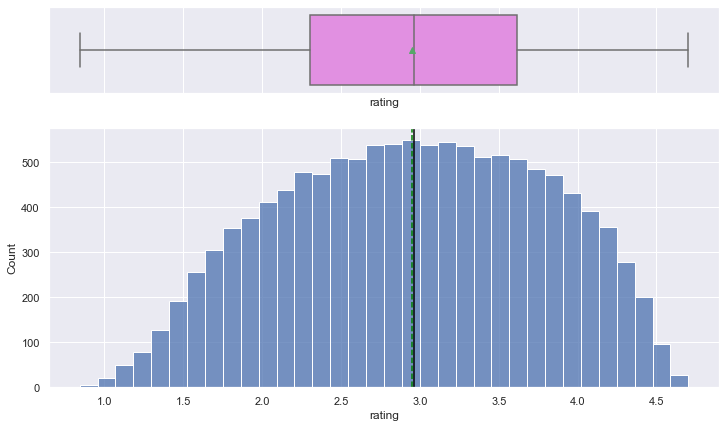

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(df3, "rating")

* The anime ratings are close to normally distributed.

### *eps*

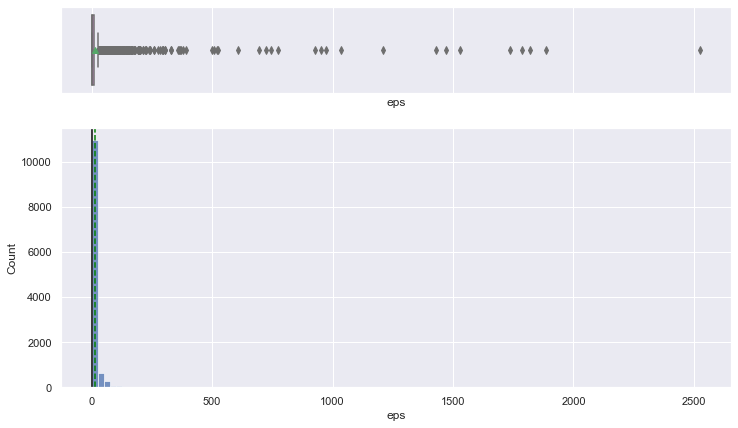

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(df3, "eps", bins=100)

* The distribution is heavily right-skewed, as there are many anime movies in the data, and they are considered to be of only one episode (as per data description).

### *duration*

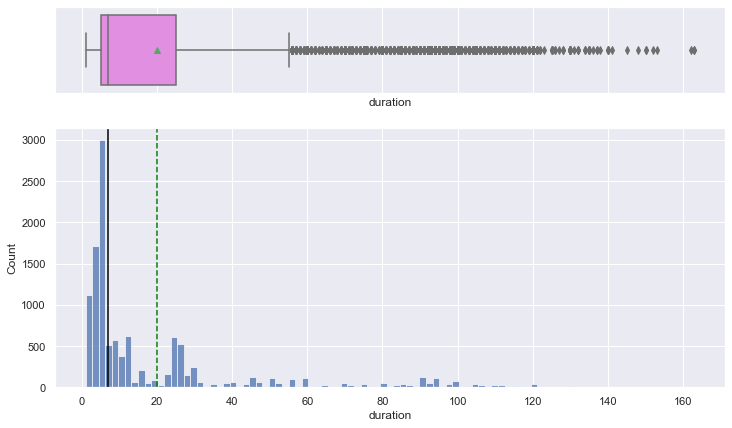

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(df3, "duration")

* The distribution is right-skewed with a median runtime of less than 10 minutes.

### *watched*

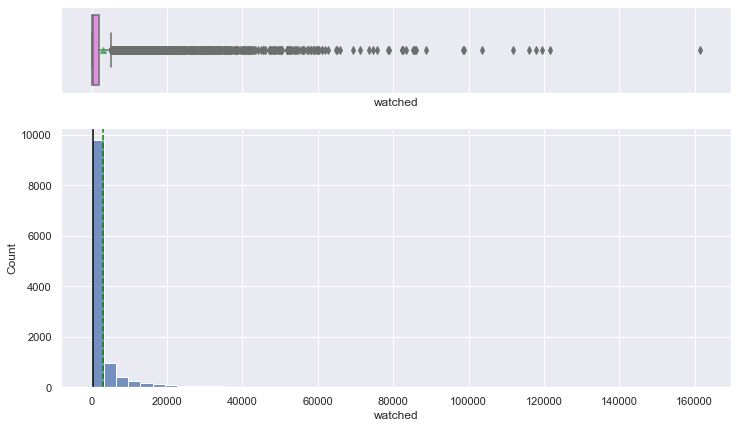

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df3, "watched", bins=50)

* The distribution is heavily right-skewed, and most of the anime having less than 500 viewers.

### *years_running*

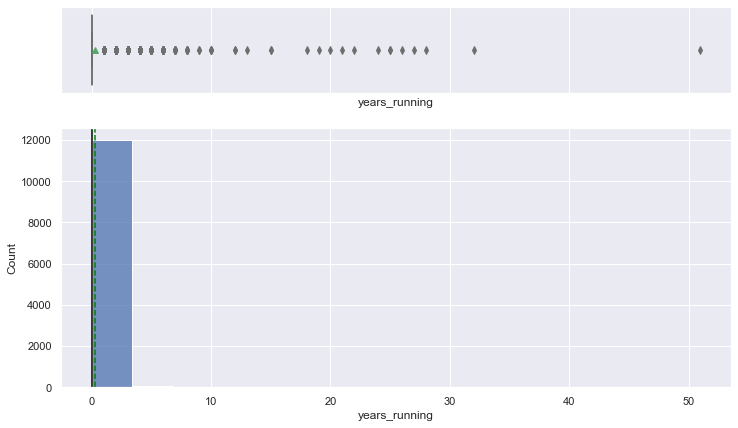

<IPython.core.display.Javascript object>

In [61]:
histogram_boxplot(df3, "years_running")

* The distribution is heavily right-skewed, and most of the anime have run for less than 1 year.

In [62]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### *mediaType*

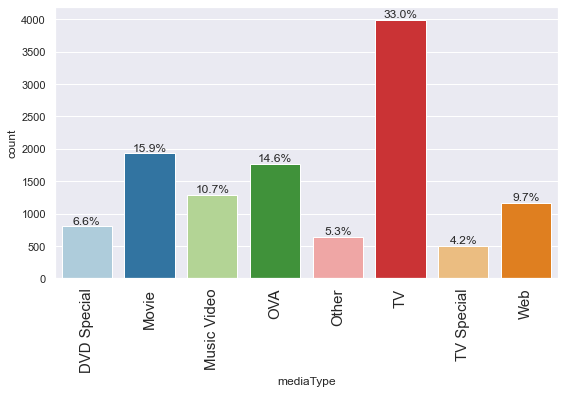

<IPython.core.display.Javascript object>

In [63]:
labeled_barplot(df3, "mediaType", perc=True)

* Distribution of the media types has changed a lot after dropping the rows with missing values.
* Most of the anime now are movies or music videos.

### *ongoing*

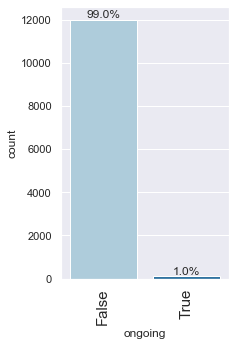

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(df3, "ongoing", perc=True)

* Very few anime in the data are ongoing.

### *sznOfRelease*

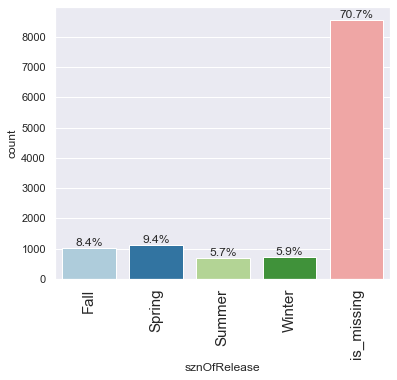

<IPython.core.display.Javascript object>

In [65]:
labeled_barplot(df3, "sznOfRelease", perc=True)

* The season of release of anime is spread out across all seasons when the value is available.

### *studio_primary*

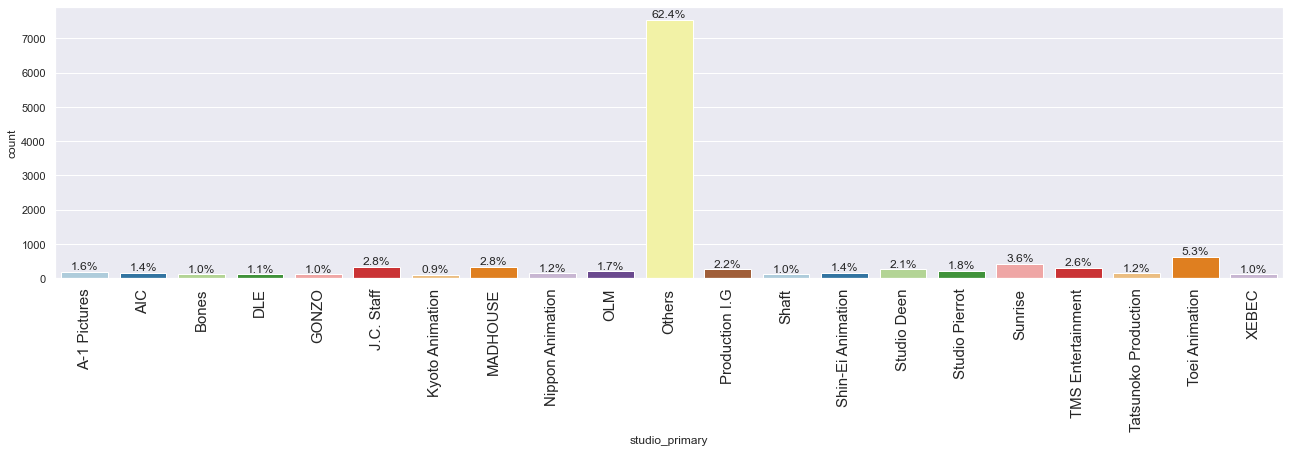

<IPython.core.display.Javascript object>

In [66]:
labeled_barplot(df3, "studio_primary", perc=True)

* *Toei Animation* is the most common studio among the available studio names.

In [67]:
# creating a list of tag columns
tag_cols = [item for item in df3.columns if "tag" in item]

<IPython.core.display.Javascript object>

In [68]:
# checking the values in tag columns
for column in tag_cols:
    print(df3[column].value_counts())
    print("-" * 50)

0    8582
1    3519
Name: tag_'Based on a Manga', dtype: int64
--------------------------------------------------
0    8799
1    3302
Name: tag_'Comedy', dtype: int64
--------------------------------------------------
0    9303
1    2798
Name: tag_'Action', dtype: int64
--------------------------------------------------
0    9904
1    2197
Name: tag_'Fantasy', dtype: int64
--------------------------------------------------
0    10089
1     2012
Name: tag_'Sci Fi', dtype: int64
--------------------------------------------------
0    10348
1     1753
Name: tag_'Shounen', dtype: int64
--------------------------------------------------
0    10465
1     1636
Name: tag_'Original Work', dtype: int64
--------------------------------------------------
0    10740
1     1361
Name: tag_'Non-Human Protagonists', dtype: int64
--------------------------------------------------
0    10817
1     1284
Name: tag_'Drama', dtype: int64
--------------------------------------------------
0    10845
1     125

<IPython.core.display.Javascript object>

* There are 1747 anime that are based on manga.
* There are 1920 anime of the Comedy genre.
* There are 1079 anime of the Romance genre.

### Bivariate analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [69]:
# creating a list of non-tag columns
corr_cols = [item for item in df3.columns if "tag" not in item]
print(corr_cols)

['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes', 'years_running', 'studio_primary', 'studios_colab']


<IPython.core.display.Javascript object>

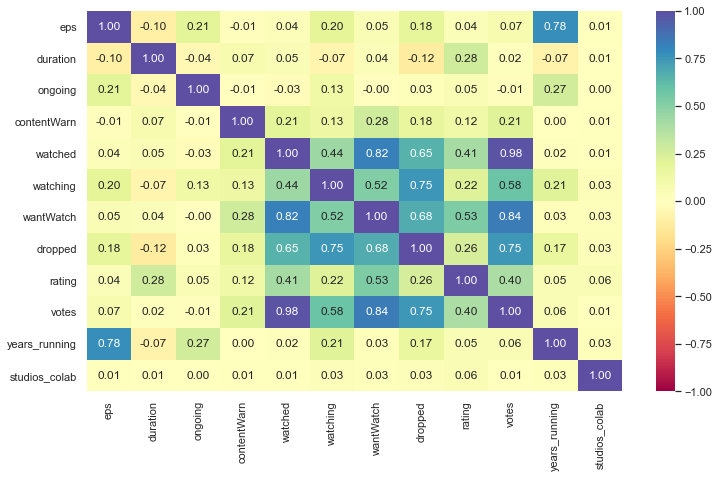

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df3[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* *watched* and *wantWatch* columns are highly correlated.
* *watched* and *votes* columns are very highly correlated.
* *wantWatch* and *votes* columns are highly correlated.

### Let's check the variation in *rating* with some of the categorical columns in our data

### *mediaType* vs *rating*

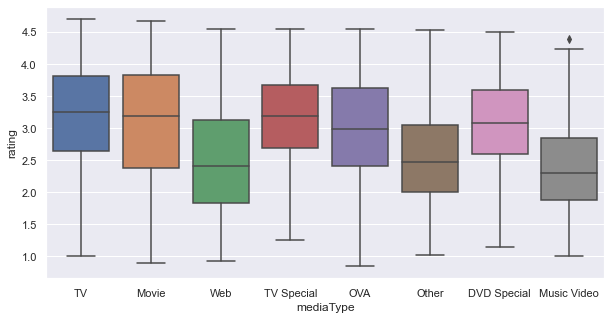

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="mediaType", y="rating", data=df3)
plt.show()

* Anime available as web series or music videos have a lower rating in general.

### *sznOfRelease* vs *rating*

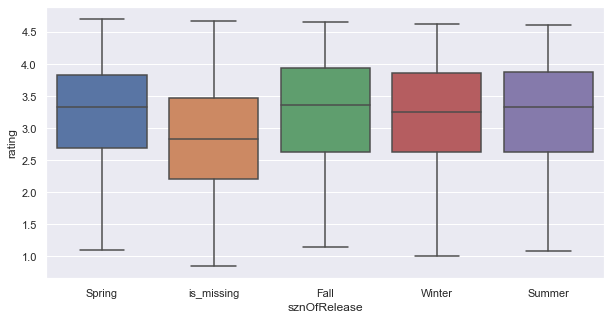

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="sznOfRelease", y="rating", data=df3)
plt.show()

* Anime ratings are almost uniformly spread across all the seasons of release.

### *studio_primary* vs *rating*

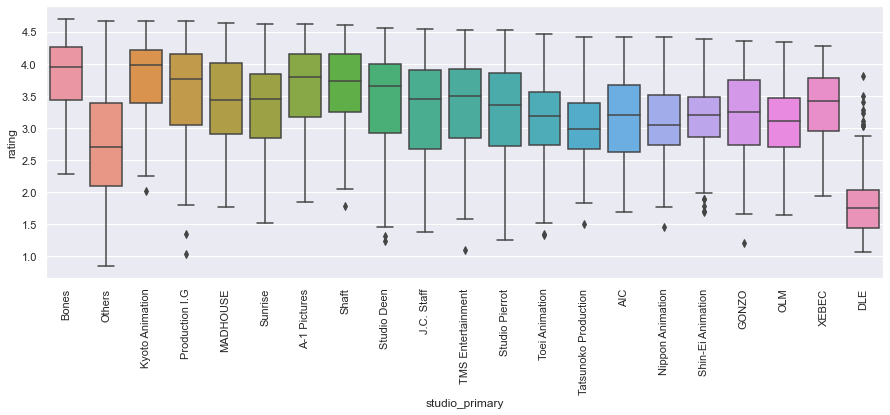

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="studio_primary", y="rating", data=df3)
plt.xticks(rotation=90)
plt.show()

* In general, the ratings are low for anime created by *DLE* studios.
* Ratings are also low, in general, for anime created by studios other than the ones in the data.

## Variable Transformations

### Let us check the numeric columns other than the *tag* columns for skewness

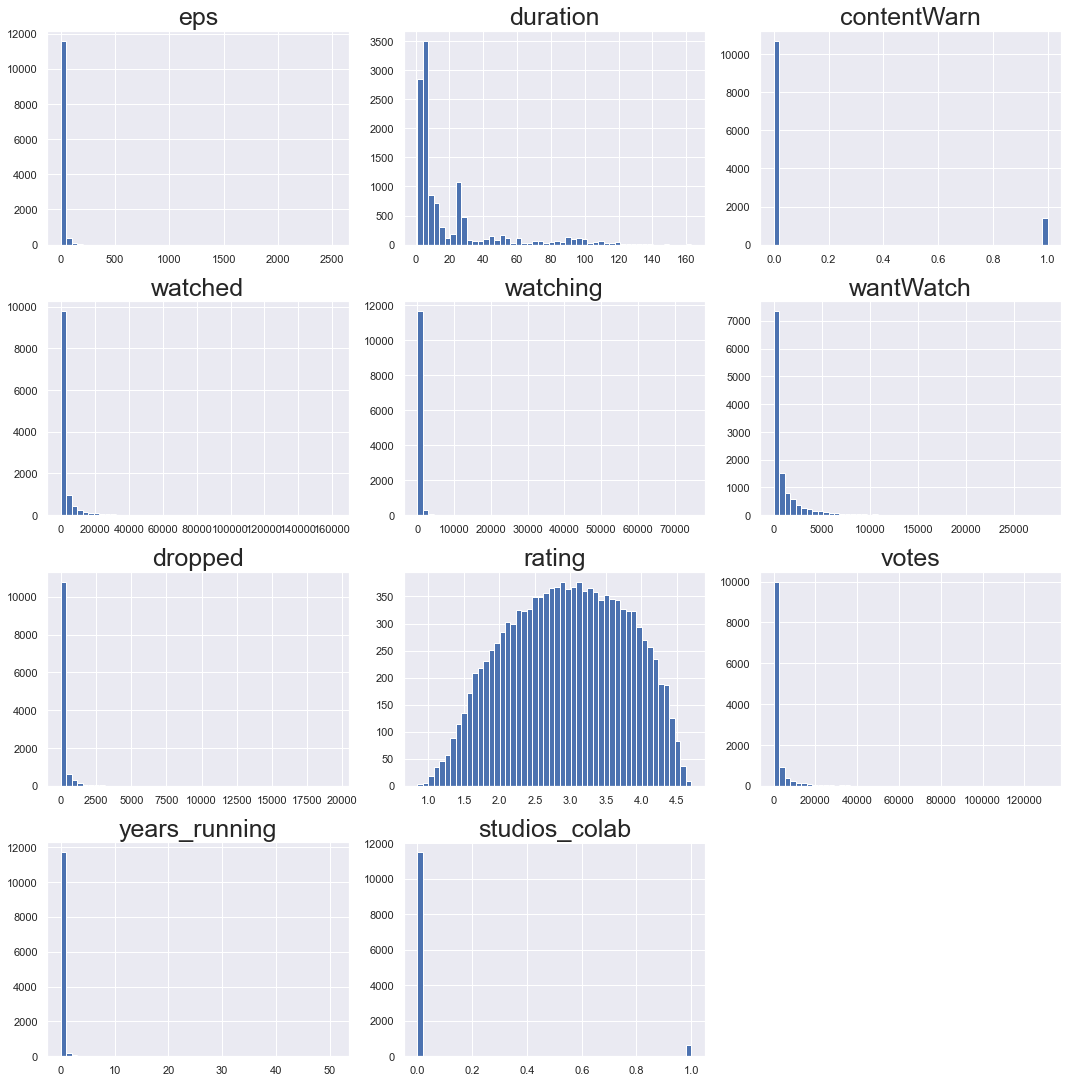

<IPython.core.display.Javascript object>

In [74]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df3.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to all but the *contentWarn*, *studios_colab*, and *rating* columns to deal with skewness in the data.**

In [75]:
# creating a copy of the dataframe
df4 = df3.copy()

# removing contentWarn and studios_colab columns as they have only 0 and 1 values
dist_cols.remove("contentWarn")
dist_cols.remove("studios_colab")

# also dropping the rating column as it is almost normally distributed
dist_cols.remove("rating")

<IPython.core.display.Javascript object>

In [76]:
# using log transforms on some columns

for col in dist_cols:
    df4[col + "_log"] = np.log(df4[col] + 1)

# dropping the original columns
df4.drop(dist_cols, axis=1, inplace=True)
df4.head()

,mediaType,ongoing,sznOfRelease,contentWarn,rating,studio_primary,studios_colab,tag_'Based on a Manga',tag_'Comedy',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Drama',tag_'Adventure',tag_'Family Friendly',tag_'Short Episodes',tag_'School Life',tag_'Romance',tag_'Shorts',tag_'Slice of Life',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'Animal Protagonists',tag_'Ecchi',tag_'Mecha',tag_'Based on a Light Novel',tag_'CG Animation',tag_'Superpowers',tag_Others,eps_log,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,votes_log,years_running_log
0,TV,False,Spring,1,4.702,Bones,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.174387,1.386294,11.549335,9.571645,10.158556,7.884953,11.368454,0.693147
1,Movie,False,is_missing,0,4.663,Others,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0.693147,4.682131,10.982441,7.282074,9.986633,4.828314,10.691058,0.000000
2,Movie,False,is_missing,1,4.661,Kyoto Animation,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,4.875197,10.734068,6.853299,9.749695,4.890349,10.426825,0.000000
3,TV,False,Fall,0,4.660,Production I.G,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,2.564949,10.132017,7.688913,8.997518,5.123964,9.765546,0.000000
4,TV,False,Spring,1,4.650,Others,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,1.791759,9.966885,8.076515,8.970178,5.164786,9.667132,0.000000


<IPython.core.display.Javascript object>

**Let's check for skewness after applying the log transformation.**

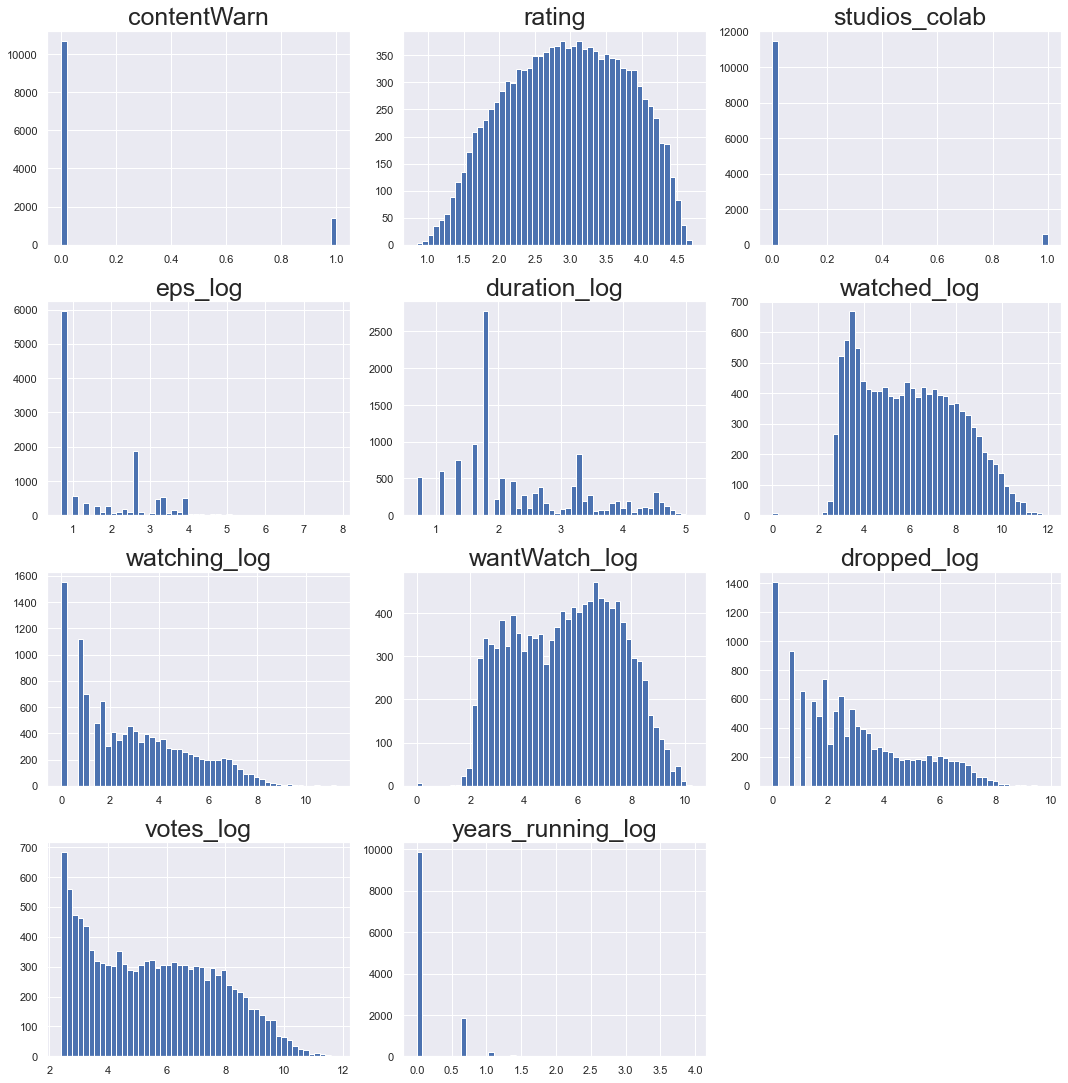

<IPython.core.display.Javascript object>

In [77]:
# creating a list of non-tag columns
dist_cols = [
    item for item in df4.select_dtypes(include=np.number).columns if "tag" not in item
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df4[dist_cols[i]], bins=50)
    # sns.histplot(data=df4, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns are still skewed, but not as heavily as before.

**Let's check for correlations between the columns (other than the tag columns)**

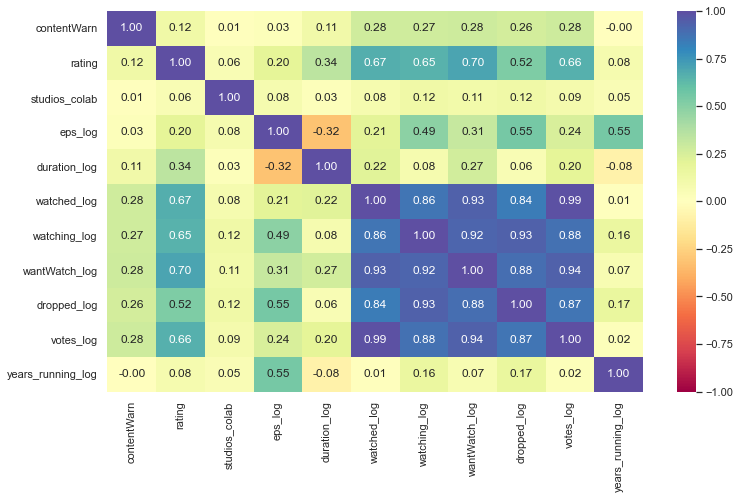

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df4[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are a few highly correlated columns.
* We will drop the *votes_log* column as it is almost perfectly correlated with the *watched* column.
* You can experiment by dropping some of the other highly correlated columns.

In [79]:
df4.drop(["votes_log"], axis=1, inplace=True)
df4.shape

(12101, 40)

<IPython.core.display.Javascript object>

## Model Building

### Define dependent variable

In [80]:
X = df4.drop(["rating"], axis=1)
y = df4["rating"]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [81]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,ongoing,contentWarn,studios_colab,tag_'Based on a Manga',tag_'Comedy',tag_'Action',tag_'Fantasy',tag_'Sci Fi',tag_'Shounen',tag_'Original Work',tag_'Non-Human Protagonists',tag_'Drama',tag_'Adventure',tag_'Family Friendly',tag_'Short Episodes',tag_'School Life',tag_'Romance',tag_'Shorts',tag_'Slice of Life',tag_'Seinen',tag_'Supernatural',tag_'Magic',tag_'Animal Protagonists',tag_'Ecchi',tag_'Mecha',tag_'Based on a Light Novel',tag_'CG Animation',tag_'Superpowers',tag_Others,eps_log,duration_log,watched_log,watching_log,wantWatch_log,dropped_log,years_running_log,mediaType_Movie,mediaType_Music Video,mediaType_OVA,mediaType_Other,mediaType_TV,mediaType_TV Special,mediaType_Web,sznOfRelease_Spring,sznOfRelease_Summer,sznOfRelease_Winter,sznOfRelease_is_missing,studio_primary_AIC,studio_primary_Bones,studio_primary_DLE,studio_primary_GONZO,studio_primary_J.C. Staff,studio_primary_Kyoto Animation,studio_primary_MADHOUSE,studio_primary_Nippon Animation,studio_primary_OLM,studio_primary_Others,studio_primary_Production I.G,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC
0,False,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.174387,1.386294,11.549335,9.571645,10.158556,7.884953,0.693147,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,False,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0.693147,4.682131,10.982441,7.282074,9.986633,4.828314,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,False,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.693147,4.875197,10.734068,6.853299,9.749695,4.890349,0.000000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,False,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,2.564949,10.132017,7.688913,8.997518,5.123964,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,False,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,1.791759,9.966885,8.076515,8.970178,5.164786,0.000000,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Split the data into train and test

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [83]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 8470
Number of rows in test data = 3631


<IPython.core.display.Javascript object>

### Fitting a linear model

In [84]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [85]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
ongoing,-0.129887
contentWarn,-0.154961
studios_colab,-0.044456
tag_'Based on a Manga',0.081183
tag_'Comedy',0.034282
tag_'Action',-0.040853
tag_'Fantasy',0.028430
tag_'Sci Fi',-0.008582
tag_'Shounen',0.069989
tag_'Original Work',-0.017086


<IPython.core.display.Javascript object>

### Coefficient Interpretations

* Coefficients of log of *eps*, log of *duration*, some of the *tag* columns, some of the *sznOfRelease* columns, some of the *studio* columns, etc. are positive.
    - Increase in these will lead to an increase in the rating of an anime.


* Coefficients of *contentWarn*, *studios_colab*, some of the *tag* columns, some of the *mediaType* columns, some of the *studio* columns, etc. are negative.
    - Increase in these will lead to a decrease in the rating of an anime.

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [86]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [87]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.458752,0.358217,0.691666,0.689208,14.24538


<IPython.core.display.Javascript object>

In [88]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.478147,0.372426,0.667813,0.661567,14.809116


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.69 and 0.67, indicating that the model explains 69% and 67% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime ratings within a mean error of 0.37 on the test set.

- MAPE of 14.81 on the test data means that we are able to predict within 15% of the anime rating.

- The overall performance is much better than the model we built in the previous session.

## Conclusions

- We have been able to build a predictive model that can be used by Streamist to predict the rating of an anime with an $R^2$ of 0.692 on the training set.


- Streamist can use this model to predict the anime ratings within a mean error of 0.37 on the test set.


- We found that the logarithm of the number of episodes in the anime and the logarithm of the duration of each episode are some of the factors which tend to increase the rating of an anime.


- We found that content warnings and collaboration between studios are some of the factors which tend to decrease the rating of an anime.


- We improved our linear regression model performance by applying non-linear transformations to some of the attributes.


- Streamist can also explore non-linear models, which might be able to better identify the patterns in the data to predict the anime ratings with even higher accuracy.

## Add-on: Forward Feature Selection 

**Forward feature selection starts with an empty model and adds in variables one by one.**

* In each forward step, you add the one variable that gives the single best improvement to your model.
* We'll use forward feature selection on all the variables.

### Note: Kindly do not run the code cells containing the Sequential Feature Selector implementation during the session, since that algorithm takes considerable time to run.

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    2.4s finished

[2021-07-15 18:57:05] Features: 1/67 -- score: 0.49345379499614184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.2s finished

[2021-07-15 18:57:05] Features: 2/67 -- score: 0.5380078612633403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  65 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    0.3s finished

[2021-07-15 18:57:06] Features: 3/67 -- score: 0.574449780399277[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-

[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.4s finished

[2021-07-15 18:57:38] Features: 29/67 -- score: 0.684574216307537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.3s finished

[2021-07-15 18:57:39] Features: 30/67 -- score: 0.6847715594119654[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  37 | elapsed:    1.3s finished

[2021-07-15 18:57:40] Features: 31/67 -- score: 0.6849399987061331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    1.5s finished

[2021-07-15 18:57:42] Features: 32/67 -- score: 0.685105263511521[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  35 | elapsed:    1.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.3s fin

[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.4s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.6s finished

[2021-07-15 18:58:17] Features: 60/67 -- score: 0.6869473535694818[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    0.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.6s finished

[2021-07-15 18:58:18] Features: 61/67 -- score: 0.6869009282804228[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.5s finished

[2021-07-15 18:58:18] Features: 62/67 -- score: 0.6868482378955024[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 ou

<IPython.core.display.Javascript object>

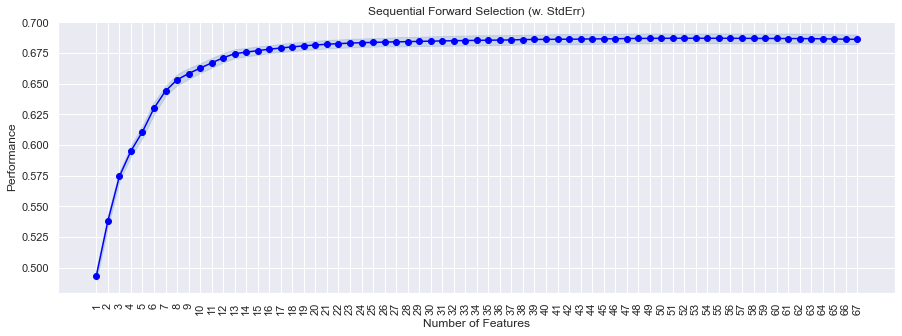

<IPython.core.display.Javascript object>

In [90]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

In [91]:
reg = LinearRegression()

# # Build step forward feature selection
sfs = SFS(
    reg,
    k_features=30,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.1s finished

[2021-07-15 18:58:21] Features: 1/30 -- score: 0.49345379499614184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  66 out of  66 | elapsed:    0.2s finished

[2021-07-15 18:58:21] Features: 2/30 -- score: 0.5380078612633403[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  65 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  65 out of  65 | elapsed:    0.4s finished

[2021-07-15 18:58:22] Features: 3/30 -- score: 0.574449780399277[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-

[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.4s finished

[2021-07-15 18:58:55] Features: 30/30 -- score: 0.6847715594119654

<IPython.core.display.Javascript object>

In [92]:
# Let us select features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 3, 5, 11, 12, 14, 17, 18, 23, 25, 29, 30, 31, 32, 33, 34, 37, 38, 39, 42, 48, 49, 54, 55, 57, 58, 59, 62, 63, 64]


<IPython.core.display.Javascript object>

In [93]:
x_train.columns[feat_cols]

Index(['contentWarn', 'tag_'Based on a Manga'', 'tag_'Action'', 'tag_'Drama'',
       'tag_'Adventure'', 'tag_'Short Episodes'', 'tag_'Shorts'',
       'tag_'Slice of Life'', 'tag_'Ecchi'', 'tag_'Based on a Light Novel'',
       'eps_log', 'duration_log', 'watched_log', 'watching_log',
       'wantWatch_log', 'dropped_log', 'mediaType_Music Video',
       'mediaType_OVA', 'mediaType_Other', 'mediaType_Web',
       'studio_primary_Bones', 'studio_primary_DLE',
       'studio_primary_Nippon Animation', 'studio_primary_OLM',
       'studio_primary_Production I.G', 'studio_primary_Shaft',
       'studio_primary_Shin-Ei Animation', 'studio_primary_Sunrise',
       'studio_primary_TMS Entertainment',
       'studio_primary_Tatsunoko Production'],
      dtype='object')

<IPython.core.display.Javascript object>

### Now we will fit an sklearn model using these features only

In [94]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [95]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [96]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

In [97]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
contentWarn,-0.152026
tag_'Based on a Manga',0.137792
tag_'Action',-0.036059
tag_'Drama',0.185107
tag_'Adventure',0.048204
tag_'Short Episodes',-0.343350
tag_'Shorts',-0.145948
tag_'Slice of Life',0.119384
tag_'Ecchi',-0.251074
tag_'Based on a Light Novel',0.112219


<IPython.core.display.Javascript object>

In [98]:
# model performance on train set
print("Training Performance\n")
lin_reg_model2_train_perf = model_performance_regression(
    lin_reg_model2, x_train_final, y_train
)
lin_reg_model2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.461868,0.360299,0.687463,0.686352,14.31564


<IPython.core.display.Javascript object>

In [99]:
# model performance on test set
print("Test Performance\n")
lin_reg_model2_test_perf = model_performance_regression(
    lin_reg_model2, x_test_final, y_test
)
lin_reg_model2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.479302,0.373664,0.666206,0.663425,14.842026


<IPython.core.display.Javascript object>

- The performance looks slightly worse than the previous model.
- Let's compare the two models we built.

In [100]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.458752,0.461868
MAE,0.358217,0.360299
R-squared,0.691666,0.687463
Adj. R-squared,0.689208,0.686352
MAPE,14.245380,14.315640


<IPython.core.display.Javascript object>

In [101]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.478147,0.479302
MAE,0.372426,0.373664
R-squared,0.667813,0.666206
Adj. R-squared,0.661567,0.663425
MAPE,14.809116,14.842026


<IPython.core.display.Javascript object>

**Observations**

* The new model (*lin_reg_model2*) uses less than half the number of features as the previous model (*lin_reg_model*).
* The performance of the new model, however, is close to our previous model.
* Depending upon time sensitivity and storage restrictions, we can choose between the models.